# Face detection and recognition inference pipeline

The following example illustrates how to use the `facenet_pytorch` python package to perform face detection and recogition on an image dataset using an Inception Resnet V1 pretrained on the VGGFace2 dataset.

The following Pytorch methods are included:
* Datasets
* Dataloaders
* GPU/CPU processing

In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os

workers = 0 if os.name == 'nt' else 4

/home/neu-wang/mby/anaconda3/envs/pl/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Determine if an nvidia GPU is available

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


#### Define MTCNN module

Default params shown for illustration, but not needed. Note that, since MTCNN is a collection of neural nets and other code, the device must be passed in the following way to enable copying of objects when needed internally.

See `help(MTCNN)` for more details.

In [2]:
mtcnn = MTCNN(
    image_size=224, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    # device=device
)
mtcnn=mtcnn.eval()

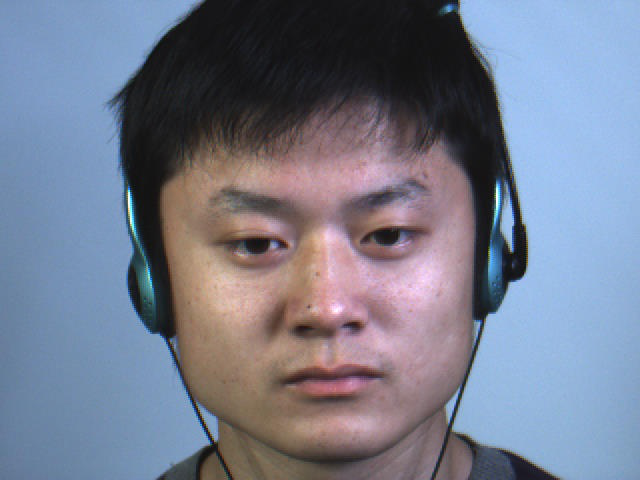

In [6]:
from pathlib import Path
from PIL import Image
img_path="/home/neu-wang/mby/self-supervised-learning/ace/preprocess/samples/img1.jpg"
# img_path="/home/neu-wang/mby/output1.png"
# img_path="/home/neu-wang/mby/self-supervised-learning/ace/preprocess/samples/icon.png"
img_path=Path(img_path).expanduser()
img=Image.open(img_path).convert('RGB')
img

In [7]:
mtcnn.detect(img)

(array([[171.8897 ,  93.59013, 473.8551 , 460.01898]], dtype=float32),
 array([0.99999905], dtype=float32))

## 绘制人脸框

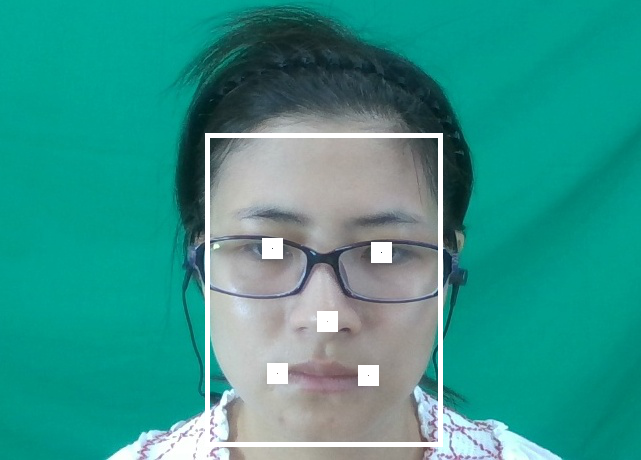

In [58]:
from PIL import Image, ImageDraw
from facenet_pytorch import MTCNN, extract_face

boxes, probs, points = mtcnn.detect(img, landmarks=True)
# Draw boxes and save faces
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
for i, (box, point) in enumerate(zip(boxes, points)):
     draw.rectangle(box.tolist(), width=5)
     for p in point:
         draw.rectangle((p - 10).tolist() + (p + 10).tolist(), width=10)
     xt=extract_face(img, box, save_path='detected_face_{}.png'.format(i))
     # xt=extract_face(img, box)
# img_draw.save('annotated_faces.png')
img_draw


In [55]:
img.crop(boxes[0]),points

(<PIL.Image.Image image mode=RGB size=237x314 at 0x7F7F18FFB670>,
 array([[[272.99158, 248.75108],
         [381.07782, 252.13351],
         [327.00494, 321.36374],
         [277.53036, 373.2613 ],
         [368.9079 , 375.81293]]], dtype=float32))